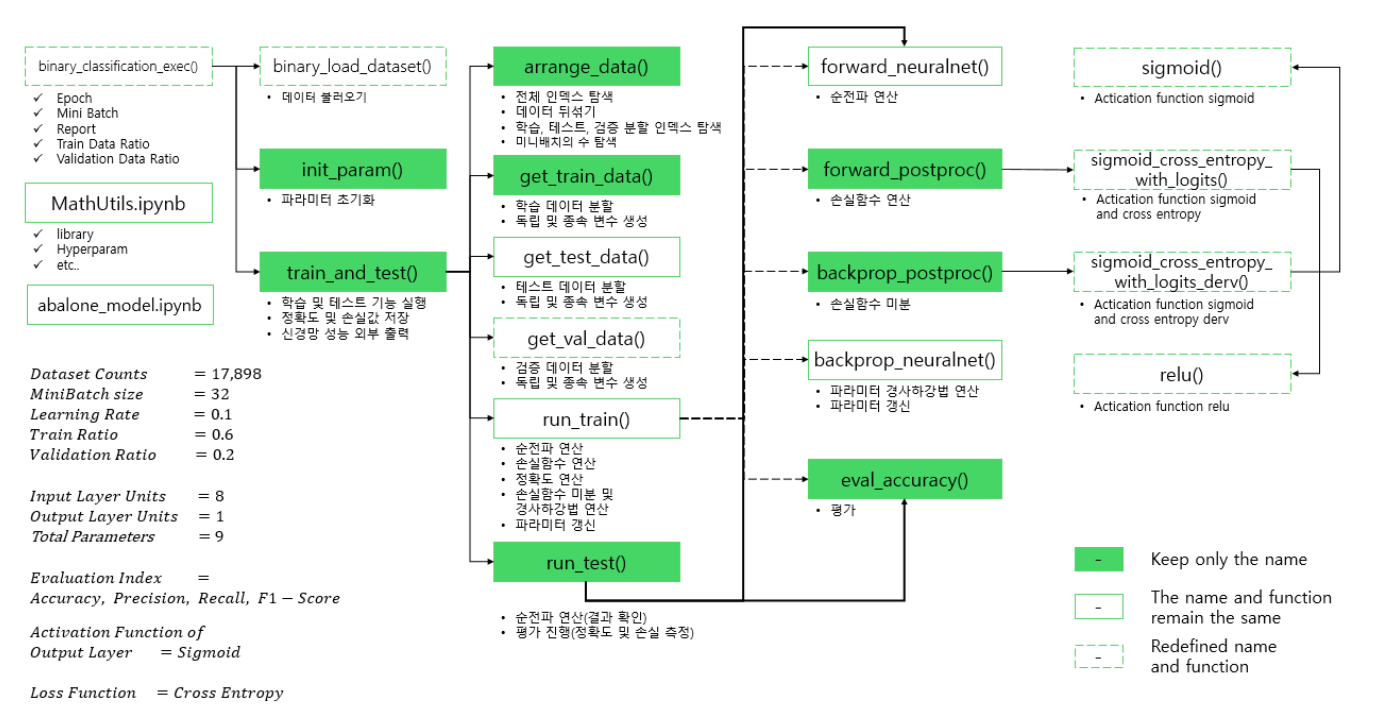

In [ ]:
%run /content/MathUtils.ipynb
%run /content/abalone_model.ipynb

In [ ]:
#data_load 
df = pd.read_csv('/content/pulsar_stars_mini.csv')

In [ ]:
#최상위 전체 실행 함수 정의 main 
def binary_classification_exec(epoch_count = 10,mb_size = 10,report = 1,train_ratio = 0.6,val_ratio = 0.2):
  binary_load_dataset()
  init_param()
  train_metrics_mean_row,val_metrics_row,test_metrics =train_and_test(epoch_count = 10,mb_size = 10,report = 1,train_ratio = 0.6,val_ratio = 0.2)
  return train_metrics_mean_row,val_metrics_row,test_metrics

In [ ]:
def binary_load_dataset():
  with open('/content/pulsar_stars.csv') as csvfile:
  #with open('/content/pulsar_stars_mini.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) #첫행 넘기기 
    rows = []


In [ ]:
binary_load_dataset()

In [ ]:
print(data.shape)

(17898, 9)


In [ ]:
def init_param():
  #기능 축소하여 초기 weight 와 bias 만 출력 
  global weight , bias
  weight = np.random.normal(RND_MEAN,RND_STD,size = [input_cnt,output_cnt])
  bias = np.zeros([output_cnt])

  print("initial Weight value:\n{}".format(weight))
  print("initial bias value:\n{}".format(bias))

In [ ]:
init_param()

initial Weight value:
[[-0.45757011]
 [ 0.69916645]
 [ 0.97505663]
 [ 0.29205014]
 [-0.89125927]
 [-1.64581376]
 [-0.22144086]
 [ 0.07639541]]
initial bias value:
[0.]


In [ ]:
def arrange_data(mb_size,train_ratio,val_ratio):
  #val 도 여기서 나누기 때문에 val_ratio 도 필요 하다
  global shuffle_map,test_begin_index,val_begin_index 
  shuffle_map = np.arange(data.shape[0])
  np.random.shuffle(shuffle_map)

  mini_batch_step_count = int(train_ratio * data.shape[0]) // mb_size
  val_begin_index = mini_batch_step_count * mb_size  #trainstep = 3 * 2 = 6 valset 의 시작 
  test_begin_index = int(val_begin_index + (val_ratio * data.shape[0])) #6 + 2(val 크기) = test_begin_index

  return mini_batch_step_count

In [ ]:
mini_batch_step_count = arrange_data(mb_size=1,train_ratio=0.6,val_ratio = 0.2)

In [ ]:
print(mini_batch_step_count)
print(test_begin_index)
print(val_begin_index)

10738
14317
10738


In [ ]:
def get_train_data(mb_size,n):
  from_idx = mb_size * n
  to_idx = mb_size * (n+1)

  train_data = data[shuffle_map[from_idx:to_idx]]
  return train_data[:,:-output_cnt],train_data[:,-output_cnt:]

In [ ]:
def get_test_data():
  test_data = data[shuffle_map[test_begin_index:]]

  return test_data[:,:-output_cnt] ,test_data[:,-output_cnt:]

In [ ]:
def get_val_data():
  val_data = data[shuffle_map[val_begin_index:test_begin_index]]
  return val_data[:,:-output_cnt] , val_data[:,-output_cnt:]

In [ ]:
train_x,train_y = get_train_data(6,0)
val_x,val_y = get_val_data()
test_x,test_y = get_test_data()

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)
print(test_x.shape)
print(test_y.shape)

(6, 8)
(6, 1)
(3579, 8)
(3579, 1)
(3581, 8)
(3581, 1)


In [ ]:
def run_train(x,y):
  loss,acc = 0,100
  return loss , acc 


In [ ]:
def run_test(x,y):
  loss,acc = 0,100
  return loss,acc

In [ ]:
def train_and_test(epoch_count,mb_size,report,train_ratio,val_ratio):
  #arangedata 불러와서 batch step count 계산 
  arrange_data(mb_size,train_ratio,val_ratio)
  #test_data 가져오기 
  test_x,test_y = get_test_data()
  #val_data 가져오기 
  val_x,val_y = get_val_data()

  #출력문에 쓸 val 값 저장 리스트 
  val_loss_row , val_acc_row = [],[]
  losses_mean_row,accs_mean_row = [],[]

  #epoch 에 따른 반복문 
  for epoch in range(epoch_count):
    losses,accs = [],[] #epoch 을 돌때마다 loss 값이랑 acc 값 갱신 되기 떄문에 
    #배치에 따른 반복문 
    for n in range(mini_batch_step_count):
      train_x,train_y = get_train_data(mb_size,n) #minibatchsize 랑 n 크기에 맞는 데이터 초기화 

      loss,acc = run_train(train_x,train_y)
    
      losses.append(loss)
      accs.append(acc)
    #val 값을 기준으로 test 시작 어차피 val 으로 함수 만들어 봤자 run_test 랑 똑같은 기능
    val_loss , val_acc = run_test(val_x,val_y)

    val_loss_row.append(val_loss)
    val_acc_row.append(val_acc)

    if report > 0 and (epoch +1) %report == 0:
      print("Epoch{} : Train-Loss = {:.3f}, Accuracy = {:.3f} / Val-Loss = {:.3f}, Accuracy = {:.3f}".format(epoch+1,np.mean(losses),np.mean(accs),val_loss,val_acc))
    
    losses_mean_row.append(losses)
    accs_mean_row.append(accs) 

  
  #test 데이터 출력 
  test_loss,test_acc = run_test(test_x,test_y)

  print("Test_Acc:{}".format(test_acc))
  print("Test_Loss:{}".format(test_loss))

  
  print("\n", "=" * 40, "Final_Test", "=" * 40)
  print("\nTest Accuracy = {:.3f}".format(test_acc))
  print("\nTest Loss     = {:.3f}".format(test_loss))

  return [losses_mean_row , accs_mean_row] , [val_loss_row,val_acc_row] , [test_loss,test_acc]


In [ ]:
train_and_test(epoch_count=10,mb_size=1,report=1,train_ratio=0.6,val_ratio=0.2)

Epoch1 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch2 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch3 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch4 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch5 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch6 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch7 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch8 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch9 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Epoch10 : Train-Loss = 0.000, Accuracy = 100.000 / Val-Loss = 0.000, Accuracy = 100.000
Test_Acc:100
Test_Loss:0

 ======================================== Final_Test ========================================

Test Acc

([[[0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,

##손실함수 계산하기 

In [ ]:
def forward_neuralnet(x):
  y_hat = np.matmul(x,weight) + bias
  return y_hat,x

In [ ]:
y_hat,_ = forward_neuralnet(train_x)

In [ ]:
print("y_hat:\n{}".format(y_hat))

y_hat:
[[-52.52001096]
 [-45.90743761]
 [-61.18684227]
 [-24.77645364]
 [-35.06095954]
 [-64.84073664]]


In [ ]:
def relu(x):
  return np.maximum(x,0)

In [ ]:
relu(train_x)

array([[1.1243750e+02, 3.8295673e+01, 5.0194347e-01, 1.0748403e+00,
        2.8127091e+00, 1.8136883e+01, 7.8599687e+00, 7.1299446e+01],
       [1.2503906e+02, 5.0350399e+01, 7.5617164e-02, 0.0000000e+00,
        2.9523411e+00, 1.5586159e+01, 7.6731863e+00, 8.0202240e+01],
       [1.0738281e+02, 3.8722393e+01, 4.6836030e-01, 1.1986486e+00,
        3.5292642e+00, 2.3842010e+01, 7.1892767e+00, 5.2950562e+01],
       [1.1550000e+02, 5.4283112e+01, 3.0951062e-01, 0.0000000e+00,
        1.9055184e+00, 1.2110911e+01, 1.1380605e+01, 1.8372572e+02],
       [1.0265625e+02, 3.9312538e+01, 5.4605591e-01, 1.4606476e+00,
        2.1571906e+00, 1.3629303e+01, 9.8985500e+00, 1.3105893e+02],
       [1.2615625e+02, 5.4975342e+01, 1.8428242e-01, 0.0000000e+00,
        5.3127089e+00, 2.5696600e+01, 5.7018943e+00, 3.5363586e+01]],
      dtype=float32)

In [ ]:
def sigmoid_cross_entropy_with_logits(x,z):
  return relu(x) - x * z + np.log(1+np.exp(-np.abs(x)))

In [ ]:
loss = sigmoid_cross_entropy_with_logits(train_x,y_hat)

In [ ]:
print(loss)

[[ 6.01765623e+03  2.04958486e+03  2.73373637e+01  5.78191432e+01
   1.50594530e+02  9.70686165e+02  4.20665995e+02  3.81594714e+03]
 [ 5.86526202e+03  2.36180820e+03  4.20306061e+00 -1.75694017e+01
   1.38537655e+02  7.31106769e+02  3.59929973e+02  3.76208157e+03]
 [ 6.67779802e+03  2.40802335e+03  2.96119885e+01  7.48037651e+01
   2.19502702e+02  1.48265935e+03  4.47079170e+02  3.29282822e+03]
 [ 2.97718040e+03  1.39922611e+03  8.52840506e+00 -5.08883976e+00
   4.92561775e+01  3.12176351e+02  2.93351642e+02  4.73579759e+03]
 [ 3.70188288e+03  1.41764785e+03  2.01482374e+01  5.28810620e+01
   7.78997984e+01  4.91485744e+02  3.56951263e+02  4.72611075e+03]
 [ 8.30622043e+03  3.61961700e+03  1.27385354e+01 -3.15324978e+01
   3.49797581e+02  1.69188307e+03  3.75420254e+02  2.32836458e+03]]


In [ ]:
def forward_postproc(y_hat,y):
  CEE = sigmoid_cross_entropy_with_logits(y_hat,y)
  loss = np.mean(CEE)
  return loss , [y,y_hat,CEE]

In [ ]:
forward_postproc(y_hat,train_y)

(2.894610477211728e-12, [array([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]], dtype=float32), array([[-52.52001096],
         [-45.90743761],
         [-61.18684227],
         [-24.77645364],
         [-35.06095954],
         [-64.84073664]]), array([[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         [1.73669967e-11],
         [6.66133815e-16],
         [0.00000000e+00]])])

##역전파 계산 

In [ ]:
#neuralnet 가중치 bias 초기화 합성 함수 미분 체인 룰 결과를 가져와서 초기화를 하는것이다
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)
    
    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b


In [ ]:
def sigmoid_cross_entropy_with_logits_derv(z,x):
  return -z + sigmoid(x) #y를 x 로 미분한것

In [ ]:
def sigmoid(x): #sigmoid 에는 y 예측 값이 들어가야 한다.
  return np.exp(-relu(x)) / (1+np.exp(-np.abs(x)))

In [ ]:
def backprop_postproc(aux_pp_y_yhat_CEE):
  y,y_hat,CEE = aux_pp_y_yhat_CEE
  g_loss_entropy = 1.0/np.prod(CEE.shape) #loss 식을 entropy 로 미분
  g_entropy_output = sigmoid_cross_entropy_with_logits_derv(y,y_hat) #entropy 식을 output 으로 미분

  g_output = g_loss_entropy * g_entropy_output
  return g_output

In [ ]:
#평가 함수 
def eval_accuracy(y,y_hat):
  estimate = np.greater(y_hat,0) #예측 값이 0을 넘겼냐
  answer = np.greater(y,0.5) #실제 값이 0.5 을 넘겼냐
  correct = np.equal(estimate,answer) #두개를 비교 하여 true 아니면 False 만 나오기 떄문에 equal 로 비교해서 정확도를 구한다

  return np.mean(correct) #평균값으로 출력

In [ ]:
def run_train(x,y):
  y_hat,aux_nn_x = forward_neuralnet(x) #y_hat 값 계산 
  loss,aux_pp_y_yhat_CEE = forward_postproc(y_hat,y)
  acc = eval_accuracy(y,y_hat)

  #역전파 수행 
  g_output = backprop_postproc(aux_pp_y_yhat_CEE)
  backprop_neuralnet(g_output,x)

  return loss,acc
  

In [ ]:
def run_test(x,y):
  y_hat,_ = forward_neuralnet(x)
  loss,_= forward_postproc(y_hat,y)
  acc = eval_accuracy(y,y_hat)

  return loss ,acc

In [ ]:
train_metrics_mean_row,val_metrics_row,test_metrics = binary_classification_exec(epoch_count = 100,mb_size = 32,report = 1,train_ratio = 0.6,val_ratio = 0.2)

initial Weight value:
[[-2.08409784]
 [-0.11751803]
 [ 1.62435961]
 [ 0.70668812]
 [ 0.19556842]
 [-1.25602389]
 [-0.31892998]
 [-0.13725036]]
initial bias value:
[0.]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch1 : Train-Loss = nan, Accuracy = nan / Val-Loss = 1828.991, Accuracy = 0.907
Epoch2 : Train-Loss = nan, Accuracy = nan / Val-Loss = 3642.254, Accuracy = 0.907
Epoch3 : Train-Loss = nan, Accuracy = nan / Val-Loss = 5455.517, Accuracy = 0.907
Epoch4 : Train-Loss = nan, Accuracy = nan / Val-Loss = 7268.780, Accuracy = 0.907
Epoch5 : Train-Loss = nan, Accuracy = nan / Val-Loss = 9082.043, Accuracy = 0.907
Epoch6 : Train-Loss = nan, Accuracy = nan / Val-Loss = 10895.306, Accuracy = 0.907
Epoch7 : Train-Loss = nan, Accuracy = nan / Val-Loss = 12708.569, Accuracy = 0.907
Epoch8 : Train-Loss = nan, Accuracy = nan / Val-Loss = 14521.832, Accuracy = 0.907
Epoch9 : Train-Loss = nan, Accuracy = nan / Val-Loss = 16335.095, Accuracy = 0.907
Epoch10 : Train-Loss = nan, Accuracy = nan / Val-Loss = 18148.358, Accuracy = 0.907
Test_Acc:0.9108386737252716
Test_Loss:17846.20150487963

 ======================================== Final_Test ========================================

Test Accuracy = 0.911
